<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Keras and Tensorflow
</p>
</div>

DS-NTL-010824<p>Phase 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


#### Neural Networks: Packages

When manually implementing:

- have to keep track of forward and backwards propagation for each layer:
    - equations and updates depends on specific layer activations
- manage caching updates to gradients and weights/activations appropriately

**Deep Learning frameworks take care of this for us**

In addition:

- efficient matrix math for speedup.
- use variants of gradient descent that are **much** faster/better.

Major frameworks:

<img src = "Images/kerastf.png" >
<center> Keras: high level API of Tensorflow. </center>

- Keras: apt for quickly building/trying neural network architectures with standard layers/optimizers. Still build complex networks.
- Tensorflow: for building more customized networks and more control of optimization.

<center><img src = "Images/pytorch.png" >
More customizable than Keras. More pythonic than base Tensorflow. Nice functionalities for NLP. </center>


We will use Keras.

In [ ]:
from tensorflow import keras

Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Images/skipconnection.png" ></center>

Skip connections, branching, etc.


#### The Sequential API

Take in a simple and sufficiently interesting dataset:

- demonstrate non-trivial decision boundary
- show sequential API at work

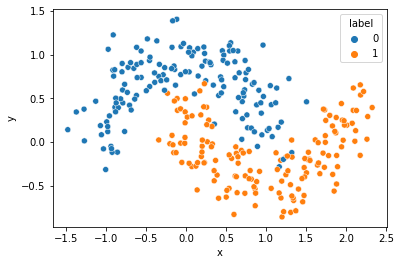

In [2]:
# generate two moons dataset
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=10)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = df )
plt.show()

Import Sequential object: use Sequential API to construct models

In [3]:
from tensorflow.keras.models import Sequential

We want to start defining layers in the model:
    
The most common layer type in neural networks: 
- the **densely** connected layer

<img src = "Images/dense_layer.png" >

In [4]:
# creates densely connected layer object
from tensorflow.keras.layers import Dense

# defines input layer, not necessary in sequential API
# but nice for visualizing network later
from tensorflow.keras.layers import Input 

The Dense object constructor's basic arguments:
- units: number of nodes in layer
- activation: 'relu', 'tanh', 'sigmoid', 'softmax'


Defining the model: a shallow neural network

In [5]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu')) # one hidden layer
model.add(Dense(units=1, activation='sigmoid'))

Building/compiling the model:

- define objective function and optimizer
- define metric to evaluate train/validation
- build the network connections, weight matrices, initializes, etc.

In [6]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Some other loss functions:
- multiclass: 'categorical_crossentropy'
- regression: 'mean_squared_error'
- regression: 'mean_absolute_error'

The optimizer:

- Adam Optimizer: 
    - smoothens learning process 
    - uses adaptive learning rate.

A pretty good optimizer. Many other optimizers (NAdam, Adadelta).

#### Optimizers have hyperparameters.

- Can help in training speed up / finding minimum

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])

In [7]:
from tensorflow.keras.optimizers import Adam

In [8]:
opt = Adam(learning_rate = 0.01) # typical parameter

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Metrics: takes in list (calculates metrics in list at each epoch):

Regression:
- 'mae'
- 'mse'
- 'rmse'

Classification:
- 'accuracy'
- 'AUC'
- 'fmeasure'
etc.

Keras provides metrics callable as objects:
- more metrics available
- pass in arguments (probability threshold, etc.)
- build your own metrics.

See documentation for more information.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Train test split the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#### .fit() method

- batch_size = # of points you train on in given forward/back-prop loop

typical batch sizes: 1, 32, 64, 128, 256, 512

Batch size:

- Stochastic Gradient Descent: batch_size = 1
- Minibatch Gradient Descent: batch_size = $n_{batch} < N_{train}$
- Batch Gradient Descent: full training set fed in on each forward/back-prop loop

The intuition behind SGD, mini-batch:

SGD: single point $i$
$$ \textbf{w}_{k+1} = \textbf{w}_k - \alpha \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Using a single point may not be good enough to sample loss function and its gradient. Noisy descent. 
- Can go wrong direction.
- Effectively looping one point at a time. Computationally inefficient.

Mini-batch gives you average of gradient over a sample of the training set: often good enough!

$$ \textbf{w}_{k+1} = \textbf{w}_k - \frac{\alpha}{n_{batch}} \sum_{i=1}^{n_{batch}} \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Substantially smaller amount of data fed through: still make progress.

Batch gradient descent: all training data.
    
- Will always lower objective on training.
- But depending on dataset:
- manipulating huge matrices just to make one gradient descent step.

<img src = "Images/gradient_descent.png" >

#### Epochs
- Number of times to cycle through **entire** training data.
- Implies number of forward/backprop cycles is: $$ \frac{N_{train}}{n_{batch}} \times \text{epochs} $$

Can train through all epochs defined or:

**Earlystopping callback on training**

- Monitor training loss and set improvement threshold (min_delta)
- Waiting certain number of epochs if no improvements (patience)
- Terminate training

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

**Validation set**

- can feed an external validation set 
- hold out a fraction of training set for validation
- evaluates on train and validation at each epoch

In [13]:
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])

Epoch 1/10000
6/6 [==============================] - 0s 45ms/step - loss: 0.7525 - accuracy: 0.4375 - auc: 0.2146 - val_loss: 0.7554 - val_accuracy: 0.4167 - val_auc: 0.3152
Epoch 2/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.7240 - accuracy: 0.5365 - auc: 0.3312 - val_loss: 0.7280 - val_accuracy: 0.4167 - val_auc: 0.4634
Epoch 3/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5469 - auc: 0.4831 - val_loss: 0.7014 - val_accuracy: 0.4167 - val_auc: 0.6723
Epoch 4/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.6042 - auc: 0.7088 - val_loss: 0.6770 - val_accuracy: 0.5000 - val_auc: 0.8598
Epoch 5/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6615 - auc: 0.8659 - val_loss: 0.6544 - val_accuracy: 0.6250 - val_auc: 0.9571
Epoch 6/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.7656 - auc: 0.9248 - val_loss: 0.6336 - 

6/6 [==============================] - 0s 4ms/step - loss: 0.3199 - accuracy: 0.8698 - auc: 0.9454 - val_loss: 0.3396 - val_accuracy: 0.8125 - val_auc: 0.9527
Epoch 49/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3185 - accuracy: 0.8698 - auc: 0.9456 - val_loss: 0.3379 - val_accuracy: 0.8125 - val_auc: 0.9536
Epoch 50/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.8698 - auc: 0.9457 - val_loss: 0.3352 - val_accuracy: 0.8125 - val_auc: 0.9545
Epoch 51/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8698 - auc: 0.9464 - val_loss: 0.3333 - val_accuracy: 0.8125 - val_auc: 0.9536
Epoch 52/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8698 - auc: 0.9463 - val_loss: 0.3311 - val_accuracy: 0.8125 - val_auc: 0.9562
Epoch 53/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8698 - auc: 0.9469 - val_loss: 0.3292 - val_accura

6/6 [==============================] - 0s 3ms/step - loss: 0.2919 - accuracy: 0.8750 - auc: 0.9524 - val_loss: 0.2841 - val_accuracy: 0.8542 - val_auc: 0.9688
Epoch 96/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.8750 - auc: 0.9522 - val_loss: 0.2836 - val_accuracy: 0.8750 - val_auc: 0.9688
Epoch 97/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.8750 - auc: 0.9525 - val_loss: 0.2837 - val_accuracy: 0.8750 - val_auc: 0.9696
Epoch 98/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.8750 - auc: 0.9527 - val_loss: 0.2832 - val_accuracy: 0.8750 - val_auc: 0.9696
Epoch 99/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.8750 - auc: 0.9527 - val_loss: 0.2828 - val_accuracy: 0.8750 - val_auc: 0.9696
Epoch 100/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.8802 - auc: 0.9527 - val_loss: 0.2823 - val_accur

Epoch 142/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2803 - accuracy: 0.8802 - auc: 0.9550 - val_loss: 0.2609 - val_accuracy: 0.8750 - val_auc: 0.9768
Epoch 143/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2800 - accuracy: 0.8802 - auc: 0.9551 - val_loss: 0.2608 - val_accuracy: 0.8750 - val_auc: 0.9768
Epoch 144/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2800 - accuracy: 0.8802 - auc: 0.9552 - val_loss: 0.2610 - val_accuracy: 0.8750 - val_auc: 0.9777
Epoch 145/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2797 - accuracy: 0.8802 - auc: 0.9551 - val_loss: 0.2605 - val_accuracy: 0.8750 - val_auc: 0.9777
Epoch 146/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.8802 - auc: 0.9552 - val_loss: 0.2598 - val_accuracy: 0.8750 - val_auc: 0.9777
Epoch 147/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2793 - accuracy: 0.8802 - auc: 0.9553 - val_loss

Epoch 189/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.8698 - auc: 0.9567 - val_loss: 0.2451 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 190/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.8698 - auc: 0.9565 - val_loss: 0.2447 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 191/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.8750 - auc: 0.9567 - val_loss: 0.2453 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 192/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.8802 - auc: 0.9571 - val_loss: 0.2462 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 193/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.8802 - auc: 0.9571 - val_loss: 0.2453 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 194/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.8802 - auc: 0.9570 - val_loss

Epoch 236/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2584 - accuracy: 0.8750 - auc: 0.9613 - val_loss: 0.2323 - val_accuracy: 0.9167 - val_auc: 0.9804
Epoch 237/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.8750 - auc: 0.9612 - val_loss: 0.2328 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 238/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.8750 - auc: 0.9613 - val_loss: 0.2318 - val_accuracy: 0.9167 - val_auc: 0.9804
Epoch 239/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.8750 - auc: 0.9611 - val_loss: 0.2317 - val_accuracy: 0.9167 - val_auc: 0.9804
Epoch 240/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2572 - accuracy: 0.8750 - auc: 0.9614 - val_loss: 0.2321 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 241/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2569 - accuracy: 0.8750 - auc: 0.9614 - val_loss

Epoch 283/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2423 - accuracy: 0.8802 - auc: 0.9668 - val_loss: 0.2200 - val_accuracy: 0.9167 - val_auc: 0.9821
Epoch 284/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.8854 - auc: 0.9672 - val_loss: 0.2192 - val_accuracy: 0.9167 - val_auc: 0.9821
Epoch 285/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.8854 - auc: 0.9674 - val_loss: 0.2191 - val_accuracy: 0.9167 - val_auc: 0.9821
Epoch 286/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.8854 - auc: 0.9674 - val_loss: 0.2190 - val_accuracy: 0.9167 - val_auc: 0.9821
Epoch 287/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2409 - accuracy: 0.8854 - auc: 0.9674 - val_loss: 0.2193 - val_accuracy: 0.9167 - val_auc: 0.9830
Epoch 288/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2404 - accuracy: 0.8906 - auc: 0.9676 - val_loss

Epoch 330/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.8906 - auc: 0.9715 - val_loss: 0.2052 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 331/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.8906 - auc: 0.9715 - val_loss: 0.2049 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 332/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.8906 - auc: 0.9717 - val_loss: 0.2060 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 333/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2234 - accuracy: 0.8906 - auc: 0.9716 - val_loss: 0.2051 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 334/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2231 - accuracy: 0.8906 - auc: 0.9717 - val_loss: 0.2042 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 335/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2226 - accuracy: 0.8958 - auc: 0.9720 - val_loss

Epoch 377/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.8958 - auc: 0.9757 - val_loss: 0.1907 - val_accuracy: 0.9167 - val_auc: 0.9857
Epoch 378/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.8958 - auc: 0.9760 - val_loss: 0.1903 - val_accuracy: 0.9167 - val_auc: 0.9857
Epoch 379/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.8958 - auc: 0.9761 - val_loss: 0.1906 - val_accuracy: 0.9375 - val_auc: 0.9857
Epoch 380/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.8958 - auc: 0.9764 - val_loss: 0.1898 - val_accuracy: 0.9167 - val_auc: 0.9857
Epoch 381/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.8958 - auc: 0.9762 - val_loss: 0.1894 - val_accuracy: 0.9167 - val_auc: 0.9857
Epoch 382/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.8906 - auc: 0.9764 - val_loss

Epoch 424/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1888 - accuracy: 0.9062 - auc: 0.9812 - val_loss: 0.1760 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 425/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1884 - accuracy: 0.9062 - auc: 0.9812 - val_loss: 0.1757 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 426/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.9115 - auc: 0.9812 - val_loss: 0.1749 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 427/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1878 - accuracy: 0.9062 - auc: 0.9814 - val_loss: 0.1742 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 428/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1873 - accuracy: 0.9062 - auc: 0.9812 - val_loss: 0.1747 - val_accuracy: 0.9583 - val_auc: 0.9902
Epoch 429/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9115 - auc: 0.9815 - val_loss

Epoch 471/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1727 - accuracy: 0.9271 - auc: 0.9847 - val_loss: 0.1604 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 472/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1720 - accuracy: 0.9271 - auc: 0.9847 - val_loss: 0.1608 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 473/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1716 - accuracy: 0.9271 - auc: 0.9849 - val_loss: 0.1612 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 474/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1715 - accuracy: 0.9271 - auc: 0.9852 - val_loss: 0.1619 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 475/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.9271 - auc: 0.9853 - val_loss: 0.1601 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 476/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1705 - accuracy: 0.9271 - auc: 0.9854 - val_loss

Epoch 518/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9375 - auc: 0.9882 - val_loss: 0.1494 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 519/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.9375 - auc: 0.9883 - val_loss: 0.1485 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 520/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1570 - accuracy: 0.9375 - auc: 0.9884 - val_loss: 0.1483 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 521/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1565 - accuracy: 0.9375 - auc: 0.9884 - val_loss: 0.1470 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 522/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1563 - accuracy: 0.9375 - auc: 0.9884 - val_loss: 0.1465 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 523/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1563 - accuracy: 0.9375 - auc: 0.9884 - val_loss

Epoch 565/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9479 - auc: 0.9912 - val_loss: 0.1357 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 566/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1441 - accuracy: 0.9479 - auc: 0.9909 - val_loss: 0.1343 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 567/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9479 - auc: 0.9912 - val_loss: 0.1342 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 568/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1431 - accuracy: 0.9479 - auc: 0.9912 - val_loss: 0.1342 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 569/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9479 - auc: 0.9913 - val_loss: 0.1344 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 570/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9479 - auc: 0.9913 - val_loss

Epoch 612/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.9531 - auc: 0.9930 - val_loss: 0.1159 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 613/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1278 - accuracy: 0.9583 - auc: 0.9932 - val_loss: 0.1149 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 614/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9583 - auc: 0.9930 - val_loss: 0.1144 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 615/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1269 - accuracy: 0.9583 - auc: 0.9931 - val_loss: 0.1146 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 616/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.9583 - auc: 0.9930 - val_loss: 0.1158 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 617/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1262 - accuracy: 0.9583 - auc: 0.9933 - val_loss

Epoch 659/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9635 - auc: 0.9950 - val_loss: 0.1073 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 660/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1129 - accuracy: 0.9635 - auc: 0.9950 - val_loss: 0.1071 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 661/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9635 - auc: 0.9951 - val_loss: 0.1070 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 662/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1125 - accuracy: 0.9635 - auc: 0.9950 - val_loss: 0.1066 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 663/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.9635 - auc: 0.9950 - val_loss: 0.1061 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 664/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1121 - accuracy: 0.9635 - auc: 0.9950 - val_loss

Epoch 706/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.9688 - auc: 0.9958 - val_loss: 0.1016 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 707/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1038 - accuracy: 0.9688 - auc: 0.9960 - val_loss: 0.1022 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 708/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9688 - auc: 0.9960 - val_loss: 0.1023 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 709/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.9688 - auc: 0.9960 - val_loss: 0.1019 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 710/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.9688 - auc: 0.9957 - val_loss: 0.1025 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 711/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1031 - accuracy: 0.9688 - auc: 0.9960 - val_loss

Epoch 753/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9688 - auc: 0.9967 - val_loss: 0.0990 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 754/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9688 - auc: 0.9967 - val_loss: 0.0988 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 755/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.9688 - auc: 0.9965 - val_loss: 0.0977 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 756/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.9688 - auc: 0.9966 - val_loss: 0.0977 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 757/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9688 - auc: 0.9966 - val_loss: 0.0981 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 758/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.9688 - auc: 0.9968 - val_loss

Epoch 800/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9635 - auc: 0.9973 - val_loss: 0.0959 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 801/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9635 - auc: 0.9973 - val_loss: 0.0951 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 802/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9635 - auc: 0.9974 - val_loss: 0.0952 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 803/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9635 - auc: 0.9973 - val_loss: 0.0949 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 804/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0906 - accuracy: 0.9635 - auc: 0.9974 - val_loss: 0.0952 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 805/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9635 - auc: 0.9974 - val_loss

Epoch 847/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0924 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 848/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0934 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 849/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0930 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 850/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0934 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 851/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0927 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 852/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0857 - accuracy: 0.9635 - auc: 0.9976 - val_loss

Epoch 894/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0824 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0928 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 895/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0925 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 896/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0917 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 897/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0917 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 898/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0909 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 899/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0817 - accuracy: 0.9635 - auc: 0.9976 - val_loss

Epoch 941/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0910 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 942/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0916 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 943/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0918 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 944/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0914 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 945/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0916 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 946/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9635 - auc: 0.9977 - val_loss

Epoch 988/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0755 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0910 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 989/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0755 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0907 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 990/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0899 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 991/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0901 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 992/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0901 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 993/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9688 - auc: 0.9978 - val_loss

6/6 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0904 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1035/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0899 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1036/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0907 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1037/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0729 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0905 - val_accuracy: 0.9583 - val_auc: 0.9955
Epoch 1038/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0729 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0906 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1039/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0729 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0905 - 

Epoch 1081/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0904 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1082/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0895 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1083/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0900 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1084/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0904 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1085/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0905 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1086/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9688 - auc: 0.9978 - va

6/6 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0894 - val_accuracy: 0.9583 - val_auc: 0.9946


In [14]:
# predict method outputs probability of
# being class 1
y_proba = model.predict(X_test) 
y_proba[0:5]

array([[9.9949551e-01],
       [9.9402666e-01],
       [9.7183466e-01],
       [9.9755120e-01],
       [7.7396794e-07]], dtype=float32)

In [15]:
# getting class predictions
y_pred = (y_proba > 0.5).astype('int')
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [16]:
# returns loss + results of metrics used
_, test_accuracy, test_AUC = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy, test_AUC)

0.9833333492279053 0.9988776445388794


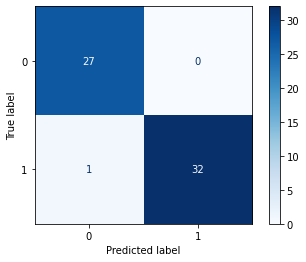

In [17]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

View decision boundary

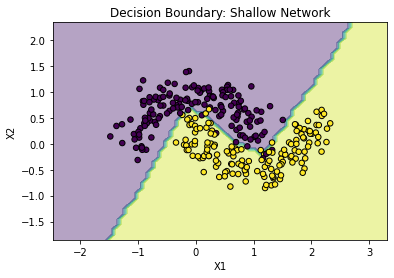

In [18]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype('int')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c = y, s=30, edgecolor="k")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Boundary: Shallow Network')
plt.show()

The model object returns a history method:
- history attribute is a dictionary storing:
   - training/validation losses.
   - metrics on train/validation sets.

In [20]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
train_history = pd.DataFrame(history.history)
train_history.index.name = 'epochs'
train_history.head()

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
epochs,,,,,,
0,0.752528,0.437500,0.214574,0.755389,0.416667,0.315179
1,0.724009,0.536458,0.331188,0.727969,0.416667,0.463393
2,0.698782,0.546875,0.483092,0.701404,0.416667,0.672321
3,0.674704,0.604167,0.708792,0.677010,0.500000,0.859821
4,0.651207,0.661458,0.865878,0.654444,0.625000,0.957143


Plotting history:

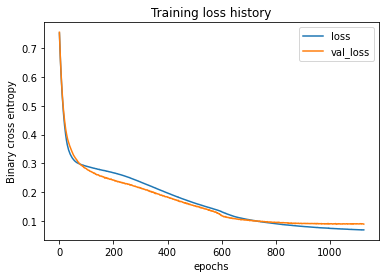

In [21]:
col_list = ['loss', 'val_loss']
train_history[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

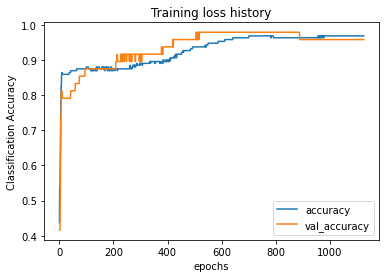

In [22]:
col_list = ['accuracy', 'val_accuracy']
train_history[col_list].plot()
plt.ylabel('Classification Accuracy')
plt.title('Training loss history')
plt.show()

#### Using neural networks to solve some harder problems

#### Image classificaton of hand-written digits

- The MNIST dataset: a classic benchmark for neural network image classification

In [23]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical # for target labels
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [24]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


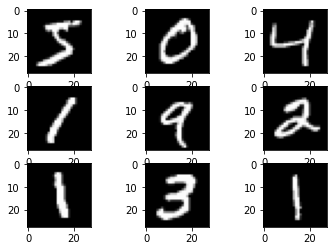

In [25]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

Good practice to normalize/standardize feature inputs:
- makes learning faster (optimization doesn't depend on variable scale)


<img src = "Images/normalize_nn.png" >

Another reason:
- keeping values small helps keeps weights stable

In [26]:
x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Sequential model: add another hidden layer

- additional layer will help us learn more complex features
- note: we've added a few more units in first hidden layer as well.

In [27]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu'))
model_images.add(Dense(8, activation='relu'))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [28]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

Let's train the model.

- Here we will use **validation** loss: stopping to prevent overfitting.

In [29]:
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)

In [30]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Epoch 1/100
1500/1500 [==============================] - 1s 810us/step - loss: 0.5321 - accuracy: 0.8465 - val_loss: 0.2574 - val_accuracy: 0.9291
Epoch 2/100
1500/1500 [==============================] - 1s 640us/step - loss: 0.2290 - accuracy: 0.9354 - val_loss: 0.2002 - val_accuracy: 0.9433
Epoch 3/100
1500/1500 [==============================] - 1s 725us/step - loss: 0.1760 - accuracy: 0.9494 - val_loss: 0.1679 - val_accuracy: 0.9499
Epoch 4/100
1500/1500 [==============================] - 1s 741us/step - loss: 0.1473 - accuracy: 0.9570 - val_loss: 0.1560 - val_accuracy: 0.9556
Epoch 5/100
1500/1500 [==============================] - 1s 671us/step - loss: 0.1262 - accuracy: 0.9626 - val_loss: 0.1472 - val_accuracy: 0.9583
Epoch 6/100
1500/1500 [==============================] - 1s 654us/step - loss: 0.1121 - accuracy: 0.9669 - val_loss: 0.1428 - val_accuracy: 0.9597
Epoch 7/100
1500/1500 [==============================] - 1s 704us/step - loss: 0.1014 - accuracy: 0.9697 - val_loss: 0

1500/1500 [==============================] - 1s 723us/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.2903 - val_accuracy: 0.9578
Epoch 57/100
1500/1500 [==============================] - 1s 729us/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.3121 - val_accuracy: 0.9606
Epoch 58/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.3065 - val_accuracy: 0.9602
Epoch 59/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.2984 - val_accuracy: 0.9597
Epoch 60/100
1500/1500 [==============================] - 1s 977us/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.3061 - val_accuracy: 0.9591
Epoch 61/100
1500/1500 [==============================] - 1s 892us/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.2984 - val_accuracy: 0.9603
Epoch 62/100
1500/1500 [==============================] - 1s 786us/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.3120 - va

In [31]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

array([[1.16703489e-12, 1.03288885e-16, 1.55639719e-18, ...,
        1.00000000e+00, 3.42918790e-21, 6.21565800e-16],
       [1.80976019e-20, 4.53333193e-08, 1.00000000e+00, ...,
        2.78607026e-10, 1.20129568e-12, 3.47773104e-22],
       [7.54455179e-12, 9.99988317e-01, 4.88929652e-09, ...,
        2.94219802e-07, 1.13301339e-05, 6.99101954e-21],
       ...,
       [0.00000000e+00, 7.79898385e-22, 3.19553697e-29, ...,
        2.26890968e-08, 1.50977032e-21, 8.50133820e-13],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.41485296e-10, 1.01910776e-32],
       [1.72427758e-21, 3.20954796e-30, 4.70821345e-23, ...,
        0.00000000e+00, 5.25229679e-21, 0.00000000e+00]], dtype=float32)

In [32]:
model_images.evaluate(x_test, y_tt_one_hot, verbose = 0)

[0.33154579997062683, 0.9621999859809875]

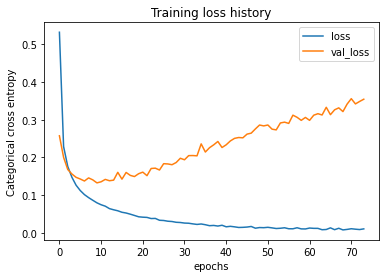

In [33]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

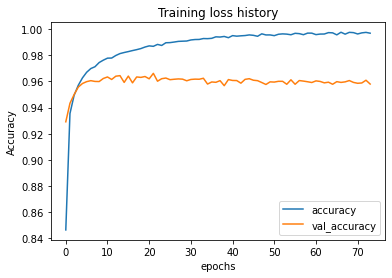

In [34]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Clearly, some overfitting.

Getting the class predictions from softmax probabilities.

In [35]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6])

Let's look at our classifier did on the test set in more detail.

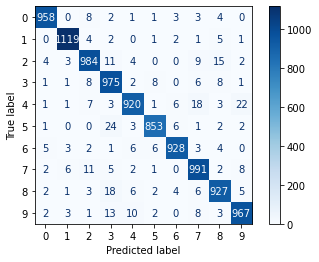

In [36]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Not bad:
- but in the context of many tasks this is not yet a viable system.
- e.g., reading checks, etc

- Next steps: increasing network complexity / train longer but not overfitting
- getting better fitting and test-set generalization

<center><b>Network Regularization</b></center>